In [ ]:
import tensorflow as tf
import numpy as np

from sklearn.datasets import load_breast_cancer

In [ ]:
x, y = load_breast_cancer(return_X_y=True)

In [ ]:
x.shape

(569, 30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1073 (4.19 KB)
Trainable params: 1073 (4.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


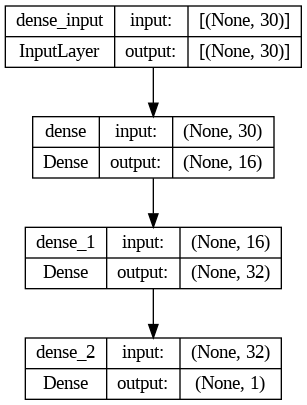

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(10)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation = tf.keras.activations.relu, input_shape = [30]),
    tf.keras.layers.Dense(32, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.binary_crossentropy)
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.save_weights('init_weights.h5')

In [ ]:
import matplotlib.pyplot as plt

def plot_model_loss(model, batch_size, epochs):

  class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.losses = []
    def on_batch_end(self, batch, logs={}):
      self.losses.append(logs.get('loss'))
    def on_train_end(self, logs={}):
      self.model.history.history['batch_loss'] = self.losses

  history = model.fit(x, y, batch_size=batch_size,
                      epochs=epochs, verbose=0, shuffle=True,
                      callbacks=[LossHistory()])

  plt.figure(figsize=(10,5))
  to_plot = 'loss' if batch_size >= x.shape[0] else 'batch_loss'
  plt.plot(range(len(history.history[to_plot])), history.history[to_plot])
  plt.title(label=f'Batch size: {batch_size}')
  plt.grid(True)

  return history

In [ ]:
x.shape

(569, 30)

CPU times: user 896 ms, sys: 9.54 ms, total: 905 ms
Wall time: 894 ms


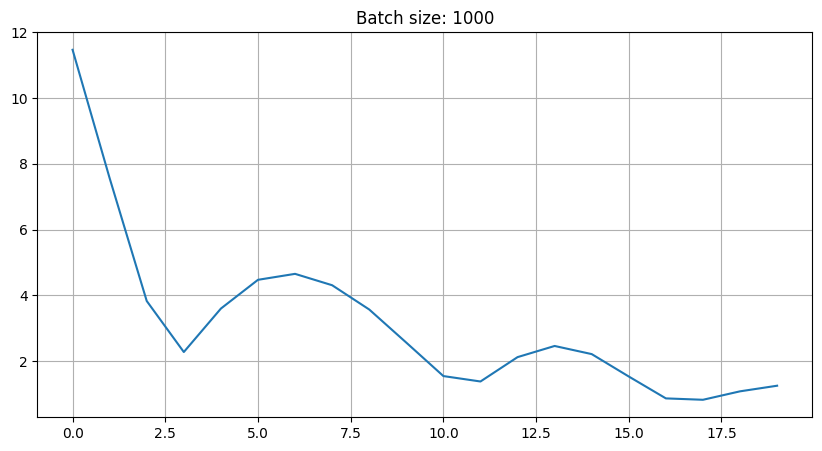

In [ ]:
# Batch Gradient Descent (BGD)
%%time
h = plot_model_loss(model, 1000, 20)

CPU times: user 994 ms, sys: 38 ms, total: 1.03 s
Wall time: 978 ms


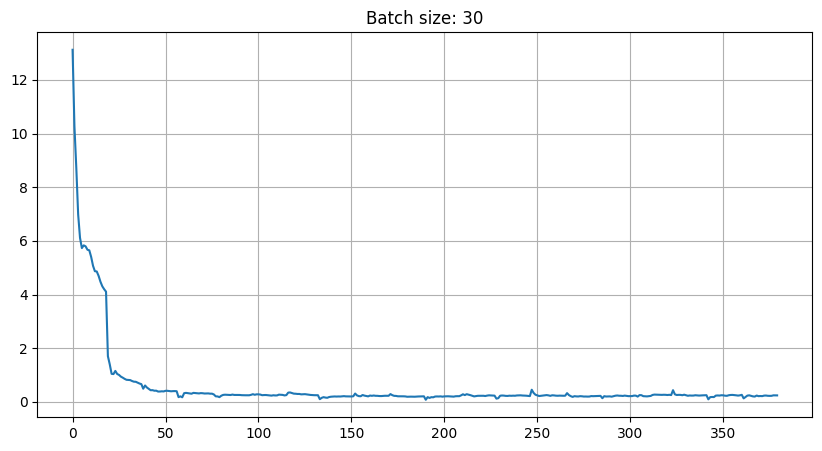

In [ ]:
# Mini-Batch Gradient Descent (MBGD)
%%time
model.load_weights('init_weights.h5')
h = plot_model_loss(model, 30, 20)

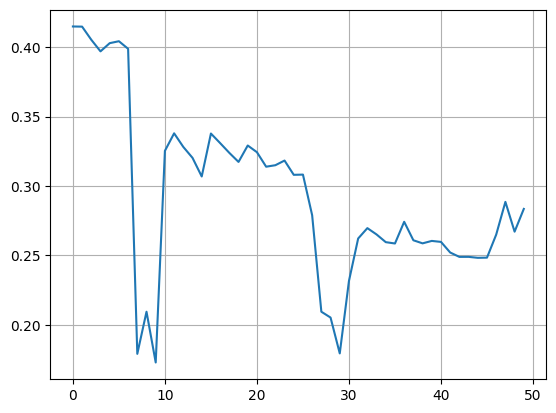

In [ ]:
plt.plot(range(50), h.history['batch_loss'][50:100])
plt.grid(True)

CPU times: user 21.2 s, sys: 1.01 s, total: 22.3 s
Wall time: 41.1 s


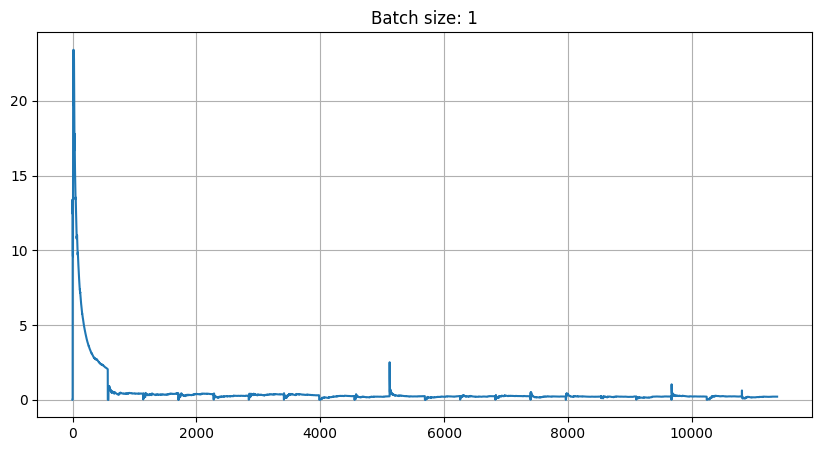

In [ ]:
# Stocastic Gradient Descent (SGD)
%%time
model.load_weights('init_weights.h5')
h = plot_model_loss(model, 1, 20)

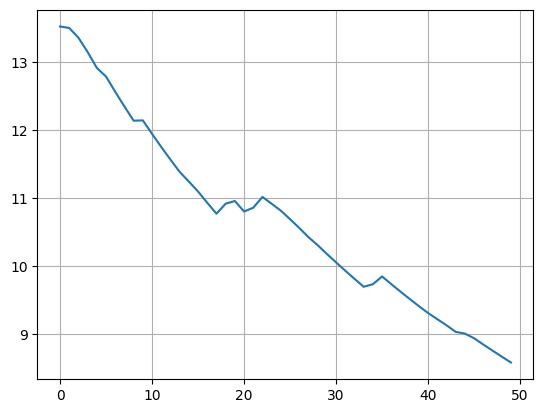

In [ ]:
plt.plot(range(50), h.history['batch_loss'][50:100])
plt.grid(True)